# Trabalho de conclusão de curso - Data Science com ênfase em Machine Learning
## Alunos: Douglas Tadeu Sabatini & Jari Fernandes Nogueira Neto


### FIB Bauru - 06/2020

### Data augmentation.
- Processo para criação de um banco de dados artificial, para treinamento posterior em uma CNN (Convolutional Neural Network).

In [1]:
# Importando bibliotecas que serão utilizadas.
import cv2
import numpy as np

import matplotlib.pyplot as plt
import os

os.chdir('/home/jarineto/Documentos/MBA_FIB/TCC')

Shape A:  (240, 170)


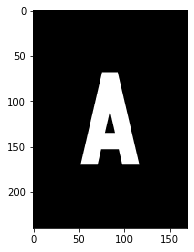

In [2]:
# Lendo amostra de imagem, para validar métodos para o data augmentation.
img= cv2.imread('./Caracteres/05.BATCH_5/0_Chars/A.png', 0)

# Exibindo imagem teste e dimensões da mesma.
plt.imshow(img, 'gray')
plt.title(print('Shape A: ',img.shape))
plt.show()

# Data augmentation passo 1 of 4: Rotação.

Aplicando rotação angular nas imagens.

In [3]:
# Rotacionando a imagem de exemplo.
## Será uma variação de 13 graus para cada lado, definidos de acordo com os padrões das imagens capturadas.

img_neg = img

rows, cols = img.shape

R1 = cv2.getRotationMatrix2D((cols/2, rows/2), 13, 1)
img1 = cv2.warpAffine(img_neg, R1, (cols, rows))

R2 = cv2.getRotationMatrix2D((cols/2, rows/2), 9, 1)
img2 = cv2.warpAffine(img_neg, R2, (cols, rows))

R3 = cv2.getRotationMatrix2D((cols/2, rows/2), 5, 1)
img3 = cv2.warpAffine(img_neg, R3, (cols, rows))

R4 = cv2.getRotationMatrix2D((cols/2, rows/2), -5, 1)
img4 = cv2.warpAffine(img_neg, R4, (cols, rows))

R5 = cv2.getRotationMatrix2D((cols/2, rows/2), -9, 1)
img5 = cv2.warpAffine(img_neg, R5, (cols, rows))

R6 = cv2.getRotationMatrix2D((cols/2, rows/2), -13, 1)
img6 = cv2.warpAffine(img_neg, R6, (cols, rows))




Variação angular que será aplicada nas imagens.


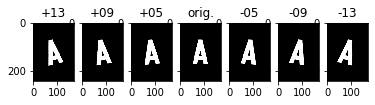

In [4]:
print('Variação angular que será aplicada nas imagens.')

plt.subplot(171)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('+13')

plt.subplot(172)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("+09")

plt.subplot(173)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("+05")

plt.subplot(174)
plt.imshow(img_neg, cmap='gray', vmin=0, vmax=255)
plt.title("orig.")

plt.subplot(175)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title('-05')

plt.subplot(176)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.title("-09")

plt.subplot(177)
plt.imshow(img6, cmap='gray', vmin=0, vmax=255)
plt.title("-13")


plt.show()

### Criando primeiras funções para rotacionar as imagens da pasta.

In [5]:
# Criando funções para cada ângulo que será rotacionado.

def rotacao13plus(image):
    R5 = cv2.getRotationMatrix2D((cols/2, rows/2), 13, 1)
    return cv2.warpAffine(image, R5, (cols, rows))

def rotacao09plus(image):
    R6 = cv2.getRotationMatrix2D((cols/2, rows/2), 9, 1)
    return cv2.warpAffine(image, R6, (cols, rows))

def rotacao05plus(image):
    R7 = cv2.getRotationMatrix2D((cols/2, rows/2), 5, 1)
    return cv2.warpAffine(image, R7, (cols, rows))

def rotacao05minus(image):
    R8 = cv2.getRotationMatrix2D((cols/2, rows/2), -5, 1)
    return cv2.warpAffine(image, R8, (cols, rows))

def rotacao09minus(image):
    R9 = cv2.getRotationMatrix2D((cols/2, rows/2), -9, 1)
    return cv2.warpAffine(image, R9, (cols, rows))

def rotacao13minus(image):
    R10 = cv2.getRotationMatrix2D((cols/2, rows/2), -13, 1)
    return cv2.warpAffine(image, R10, (cols, rows))


In [10]:
# Criando dicionário das funções criadas.
angle_transform = {'Rotação +13 graus': rotacao13plus,
                   'Rotação +09 graus': rotacao09plus,
                   'Rotação +05 graus': rotacao05plus,
                   'Rotação -05 graus': rotacao05minus,
                   'Rotação -09 graus': rotacao09minus,
                   'Rotação -13 graus': rotacao13minus,
                 }

images_path = './Caracteres/06.BATCH_6/0_Chars' # Caminho das imagens para tratamento.
angle_augmented_path = './Caracteres/06.BATCH_6/1_Angle' # Caminho para gravação.
images=[] # Será utilizado para armazenar os caminhos das imagens, para log.

In [11]:
for im in os.listdir(images_path):  # Cria um array com as imagens tratadas (log).
    images.append(os.path.join(images_path,im))

images_to_generate = len(os.listdir(images_path)) # Mapeia a quantidade de arquivos que serão tratados.

i=1

while i <= images_to_generate:
    image = os.listdir(images_path)[i-1]
    original_image = cv2.imread(images_path +'/' + image, 0)
    transformed_image = None
    transformation_count = len(angle_transform) # Tratamentos que serão aplicados em cada imagem.
    
    n = 1
    
    while n <= transformation_count:
        key = list(angle_transform)[n-1] # Seleciona no dicionário o tratamento à ser aplicado.
        
        transformed_image = angle_transform[key](original_image)
                     
        new_image_path = angle_augmented_path + '/' + image[:-4] + '_' + str(n) + '_' + '.png'
        
        cv2.imwrite(new_image_path, transformed_image) # Grava a imagem tratada.
        n = n + 1

    path_4_orig = angle_augmented_path + '/' + image[:-4] + '_0_' + '.png'    
    cv2.imwrite(path_4_orig, original_image) # Grava a imagem que foi processada.    
    i = i+1

# Data augmentation passo 2 of 4: Perspective.

- Etapa para adicionar perspectivas laterais nas imagens (3D).

In [6]:
# Lendo imagem e marcando pontos iniciais.

imgB= cv2.imread('./Caracteres/06.BATCH_6/1_Angle/5_0_.png', 0)

imgB = cv2.bitwise_not(imgB) # Apenas para facilitar a visualização de alteração da perspectiva.

pts = np.float32([[0, 0], [0, 170], [240, 0], [240, 170]]) # Marcando pontos iniciais, fixo.

# Adicionando alterações de perspectiva.

pts1 = np.float32([[25, 20], [0, 170], [240, 0], [225, 160]])
matrix1 = cv2.getPerspectiveTransform(pts, pts1)
img_p1 = cv2.warpPerspective(imgB, matrix1, (170, 240))

pts2 = np.float32([[0, 0], [25, 150], [225, 10], [240, 170]])
matrix2 = cv2.getPerspectiveTransform(pts, pts2)
img_p2 = cv2.warpPerspective(imgB, matrix2, (170, 240))

pts3 = np.float32([[15, 10], [0, 170], [240, 0], [215, 150]])
matrix3 = cv2.getPerspectiveTransform(pts, pts3)
img_p3 = cv2.warpPerspective(imgB, matrix3, (170, 240))

pts4 = np.float32([[0, 0], [15, 160], [210, 25], [240, 170]])
matrix4 = cv2.getPerspectiveTransform(pts, pts4)
img_p4 = cv2.warpPerspective(imgB, matrix4, (170, 240))



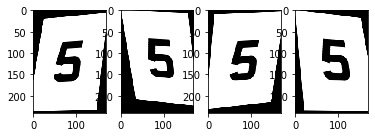

In [7]:
# Alterações de perspectiva que serão aplicadas.
plt.subplot(141)
plt.imshow(img_p1, cmap='gray', vmin=0, vmax=255)

plt.subplot(142)
plt.imshow(img_p2, cmap='gray', vmin=0, vmax=255)

plt.subplot(143)
plt.imshow(img_p3, cmap='gray', vmin=0, vmax=255)

plt.subplot(144)
plt.imshow(img_p4, cmap='gray', vmin=0, vmax=255)

plt.show()

In [94]:
# Criando funções para rotação de perspectiva.

pts = np.float32([[0, 0], [0, 170], [240, 0], [240, 170]]) # Pontos fixos - imagem padrão.

def perspectiva1(image):
    pts1 = np.float32([[25, 20], [0, 170], [240, 0], [225, 160]])
    matrix1 = cv2.getPerspectiveTransform(pts, pts1)
    return cv2.warpPerspective(image, matrix1, (170, 240))

def perspectiva2(image):
    pts2 = np.float32([[0, 0], [25, 150], [225, 10], [240, 170]]) 
    matrix2 = cv2.getPerspectiveTransform(pts, pts2)
    return cv2.warpPerspective(image, matrix2, (170, 240))

def perspectiva3(image):
    pts3 = np.float32([[15, 10], [0, 170], [240, 0], [215, 150]]) 
    matrix3 = cv2.getPerspectiveTransform(pts, pts3)
    return cv2.warpPerspective(image, matrix3, (170, 240))

def perspectiva4(image):
    pts4 = np.float32([[0, 0], [15, 160], [210, 25], [240, 170]]) 
    matrix4 = cv2.getPerspectiveTransform(pts, pts4)
    return cv2.warpPerspective(image, matrix4, (170, 240))

In [97]:
# Criando segundo dicionário de funções.
twist_transform = {'Alteração de perspectiva 1': perspectiva1,
                   'Alteração de perspectiva 2': perspectiva2,
                   'Alteração de perspectiva 3': perspectiva3,
                   'Alteração de perspectiva 4': perspectiva4,
                 }

images_path2 = './Caracteres/06.BATCH_6/1_Angle' # Caminho das imagens para tratamento.
twist_augmented_path = './Caracteres/06.BATCH_6/2_Twisted' # Caminho para gravação.
images2=[] # Será utilizado para armazenar os caminhos das imagens, para log.

In [98]:
for im in os.listdir(images_path2):  # Cria um array com as imagens tratadas (log).
    images2.append(os.path.join(images_path2, im))

images_to_generate = len(os.listdir(images_path2)) # Mapeia a quantidade de arquivos que serão tratados.

i=1

while i <= images_to_generate:
    image = os.listdir(images_path2)[i-1]
    original_image = cv2.imread(images_path2 +'/' + image, 0)
    transformed_image = None
    transformation_count = len(twist_transform) # Tratamentos que serão aplicados em cada imagem.
    
    n = 1
    
    while n <= transformation_count:
        key = list(twist_transform)[n-1] # Seleciona no dicionário o tratamento à ser aplicado.
        
        transformed_image = twist_transform[key](original_image)
                     
        new_image_path = twist_augmented_path + '/' + image[:-4] + str(n) + '_' + '.png'
        
        cv2.imwrite(new_image_path, transformed_image) # Grava a imagem tratada.
        n = n + 1

    path_4_orig = twist_augmented_path + '/' + image[:-4] + '0_' + '.png'    
    cv2.imwrite(path_4_orig, original_image) # Grava a imagem que foi processada.    
    i = i+1

# Data augmentation passo 3 of 4: Blur.

Etapa simples para desfocar as imagens geradas até então.

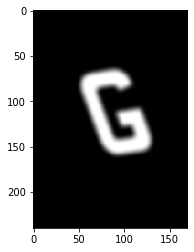

In [101]:
# Exemplificando primeiro ruído que será aplicado à imagem: Blur (desfocando a imagem). 

img_y = cv2.imread('./Caracteres/06.BATCH_6/2_Twisted/G_1_2_.png')

blur = cv2.GaussianBlur(img_y,(9,9),3)
plt.imshow(blur)
plt.show()

### Criando função para desfocar a imagem.

In [102]:
def desfoque(image):
    return cv2.GaussianBlur(image,(9,9),3)

In [103]:
# Definindo caminhos para o tratamento.

images_path3 = './Caracteres/06.BATCH_6/2_Twisted' # Caminho das imagens para tratamento.
blur_augmented_path = './Caracteres/06.BATCH_6/3_Blur' # Caminho para gravação.
images3=[] # Será utilizado para armazenar os caminhos das imagens, para log.

In [104]:
for im in os.listdir(images_path3):  # Cria um array com as imagens tratadas.
    images3.append(os.path.join(images_path3, im))

images_to_generate = len(os.listdir(images_path3)) # Mapeia a quantidade de arquivos que serão tratados.

i=1

while i<=images_to_generate:
    image = os.listdir(images_path3)[i-1]
    original_image = cv2.imread(images_path3+'/'+image, 0)

    blur_transform = desfoque(original_image)
                     
    new_image_path = blur_augmented_path + '/' +  image[:-4] + '1' +'.png'
        
    cv2.imwrite(new_image_path, blur_transform) # Grava a imagem tratada.   

    i = i+1

# Data augmentation passo 4 of 4: Esqueleto.

Captura o esqueleto da imagem, que será utilizado para o aprendizado da rede neural.
Duas abordagens de 'esqueletização', para checagem.

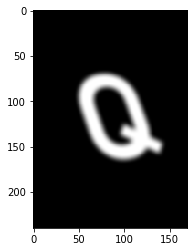

In [3]:
# Lendo imagem teste.
img = cv2.imread('./Caracteres/06.BATCH_6/3_Blur/QB_1_4_1.png', 0)
plt.imshow(img, 'gray')
plt.show()

In [2]:
# Criando funções do esqueleto de Zhang-Suen

def neighbours(image, x, y):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    neigh = [img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],
             img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1]] 
    return neigh   

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )

def zhangSuen(image):
    "the Zhang-Suen Thinning Algorithm"
    skeleton = image.copy()  # deepcopy to protect the original image
    skeleton = cv2.divide(skeleton, 255)
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = skeleton.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(skeleton, x, y)
                if (skeleton[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0): # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            skeleton[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(skeleton, x, y)
                if (skeleton[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0): # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            skeleton[x][y] = 0

    skeleton = cv2.multiply(skeleton, 255)
    return skeleton

def find_skeleton_morph(img, kernel):
    skeleton = np.zeros(img.shape, np.uint8)
    img_copy = img

    iters = 0
    while(True):
        eroded = cv2.erode(img_copy, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(img_copy, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        img_copy = eroded

        iters += 1
        if cv2.countNonZero(img_copy) == 0:
            return skeleton



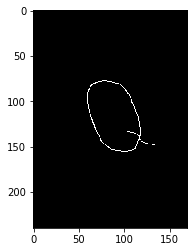

In [116]:
# Exibindo exemplo do esqueleto da imagem.
img_esq = zhangSuen(img)
plt.imshow(img_esq, 'gray')
plt.show()

In [117]:
# Definindo caminhos para o tratamento da primeira abordagem (principal - Zhang Suen).

images_path4 = './Caracteres/06.BATCH_6/3_Blur' # Caminho das imagens para tratamento.
skull_augmented_path = './Caracteres/06.BATCH_6/5_train' # Caminho para gravação.
images4=[] # Será utilizado para armazenar os caminhos das imagens, para log.

In [118]:
for im in os.listdir(images_path4):  # Cria um array com as imagens tratadas.
    images4.append(os.path.join(images_path4,im))

images_to_generate = len(os.listdir(images_path4)) # Mapeia a quantidade de arquivos que serão tratados.

i=1

while i<=images_to_generate:
    image = os.listdir(images_path4)[i-1]
    original_image = cv2.imread(images_path4+'/'+image, 0)

    skull_transform = zhangSuen(original_image)
    
    try:
        int(image[:1])
        var = 'num'

    except:
        var = 'char'
        
    new_image_path = skull_augmented_path + '/' + var + '/' + image[:1] + '/' + image[:-4] + '-skull' +'.png'
            
    cv2.imwrite(new_image_path, skull_transform) # Grava a imagem tratada.
    

    i = i+1